# Interpolación y ajuste de curvas (fiteo)  <a class="tocSkip">

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation')
fsize= (9,6)

## Interpolación

Muchas veces tenemos mediciones de datos variando algún parámetro en las condiciones, y estos datos están medidos a intervalos mayores de los que deseamos. En estos casos es común tratar de inferir los valores que tendrían las mediciones para valores intermedios de nuestro parámetro. Una opción es interpolar los datos. Algunas facilidades para ello están en el subpaquete **interpolate** del paquete **Scipy**.  
Generemos algunos "datos experimentales"

In [2]:
def fmodel(x):
  return (np.sin(x))**2*np.exp(-(x/3.5)**2)

In [3]:
x0 = np.linspace(0., 2*np.pi, 60)
y0 = fmodel(x0)
x = np.linspace(0., 2*np.pi, 8)
y = fmodel(x)

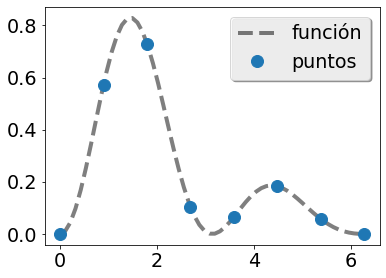

In [19]:
plt.plot(x0,y0,'--k', label='función', alpha=0.5)
plt.plot(x,y,'o', markersize=12, label='puntos')
plt.legend(loc='best')

Acá hemos simulado datos con una función oscilante con un decaimiento exponencial.  
Ahora, importamos el submódulo `interpolate` del módulo `scipy`, adecuado para interpolar:

In [5]:
from scipy import interpolate

La interpolación funciona en dos pasos. En el primer paso realizamos todos los cálculos y obtenemos la función interpolante, y en una segunda etapa utilizamos esa función para interpolar en los nuevos puntos sobre el eje x que necesitamos.  

Utilizamos los *arrays* `x` e `y` como los pocos "datos experimentales" obtenidos

In [7]:
print("x = {}".format(x))

x = [0.         0.8975979  1.7951958  2.6927937  3.5903916  4.48798951
 5.38558741 6.28318531]


y creamos la función interpolante basada en estos puntos:

In [8]:
interpol_lineal = interpolate.interp1d(x, y)

In [9]:
interpol_lineal # función

Ahora, creamos un conjunto de puntos `x1` donde queremos evaluar la función interpolando entre datos medidos

In [10]:
x1 = np.linspace(0, 2*np.pi, 33)
y1_l = interpol_lineal(x1)

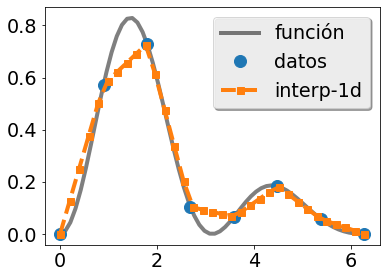

In [21]:
plt.plot(x0,y0, '-k', label='función', alpha=0.5)
plt.plot(x, y,'o',  markersize=12, label='datos')
plt.plot(x1, y1_l,'--s', markersize=7, label='interp-1d')
plt.legend(loc='best')

Como vemos, la función que creamos consiste de tramos rectos entre los puntos "datos".  
Para realizar interpolaciones lineales (una recta entre pares de puntos) también se puede utilizar la rutina `interp()` del módulo **Numpy**, cuyos argumentos requeridos son: los nuevos puntos `x1` donde queremos interpolar, además de los valores originales de `x` y de `y` de la tabla a interpolar:

In [23]:
y1_l2= np.interp(x1,x,y)

Notar que `y1_l2` da exactamente los mismos valores que `y1_l`

In [24]:
np.all(y1_l2 == y1_l)

True

Si bien el uso de `np.interp` es más directo, porque no se crea la función intermedia,  cuando creamos la función con `interp1d` podemos aplicarla a diferentes conjuntos de valores de x:

In [27]:
interpol_lineal(np.linspace(0, 2*np.pi, 12))

array([0.00000000e+00, 3.64223643e-01, 6.15515285e-01, 7.16230928e-01,
       3.88910634e-01, 9.71667086e-02, 7.27120078e-02, 1.19301459e-01,
       1.72109481e-01, 9.17229560e-02, 3.64455561e-02, 2.39038977e-33])

La interface `interp1d()` tiene un argumento opcional, `kind`, que define el tipo de interpolación a utilizar. Cuando utilizamos el argumento 'nearest' utiliza para cada valor el más cercano

In [28]:
interpol_near = interpolate.interp1d(x, y, kind='nearest')
y1_n = interpol_near(x1)

33 33 8


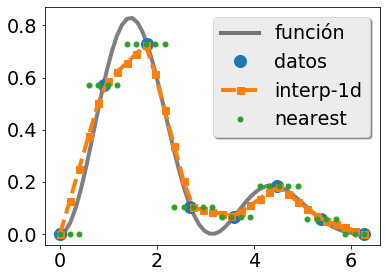

In [31]:
plt.plot(x0,y0, '-k', label='función', alpha=0.5)
plt.plot(x, y,'o', markersize=12, label='datos')
plt.plot(x1, y1_l,'--s', markersize=7, label='interp-1d')
plt.plot(x1, y1_n,'.', label='nearest')
plt.legend(loc='best');
print(x1.size, x1.size, x.size)

### Interpolación con polinomios

**Scipy** tiene rutinas para interpolar los datos usando un único polinomio global con grado igual al número de puntos dados:

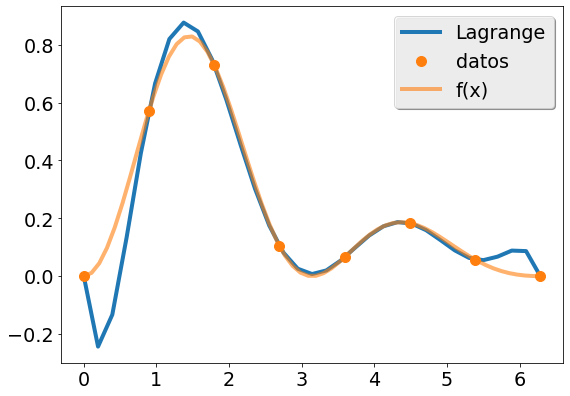

In [37]:
f = interpolate.lagrange(x, y)
y2 = f(x1)
plt.figure(figsize=fsize)
plt.plot(x1,y2,'-', label='Lagrange')
plt.plot(x,y,'o', label='datos')
plt.plot(x0,y0,'-', color='C1', label='f(x)', alpha=0.7)
plt.legend(loc='best')

Los polinomios interpolantes pueden tener problemas, principalmente en las puntas, o cuando el grado del polinomio es muy alto. Consideremos por ejemplo el caso donde tenemos una tabla `x1  f(x1)` con muchos datos y queremos interpolar sobre una nueva tabla de valores `x0`

In [41]:
print('Número de datos:', x1.size)

Número de datos: 33


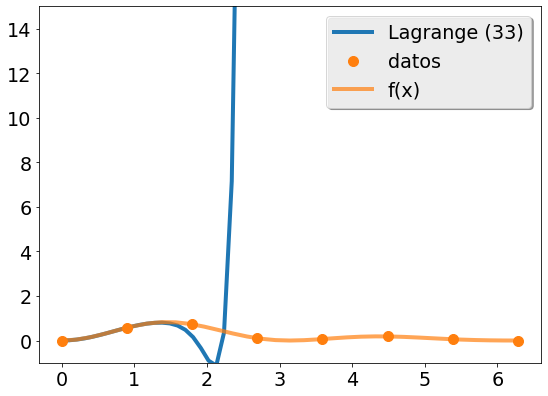

In [42]:
plt.figure(figsize=fsize)
f1 = interpolate.lagrange(x1, fmodel(x1))
plt.plot(x0,f1(x0),'-', label='Lagrange ({})'.format(x1.size))
plt.plot(x,y,'o', label='datos')
plt.plot(x1,fmodel(x1),'-', color='C1', label='f(x)', alpha=0.7)
plt.ylim((-1,15))
plt.legend(loc='best')


De todas maneras, para los casos en que es aplicable, existen dos implementaciones: `interpolate.lagrange()` y una segunda llamada `interpolate.barycentric_interpolate()` que está basada en un trabajo de 2004 y es numéricamente más estable.

### Splines

-  Las *Splines* son interpolaciones por polinomios de a trazos, que se eligen para que no sólo los valores sino también sus derivadas coincidan dando una curva suave.
-  Para eso, si se pide que la aproximación coincida con los valores tabulados en los puntos dados, la aproximación es efectivamente una **interpolación**.
-  *Cubic Splines* se refiere a que utilizamos polinomios cúbicos en cada trozo.

El argumento opcional `kind` de la interface `interp1d()`, que define el tipo de interpolación a utilizar, acepta valores del tipo *string* que pueden ser: 'linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', o un número entero indicando el orden.

In [44]:
interp = {}
for k in ['zero', 'slinear', 'quadratic', 'cubic']:
  interp[k] = interpolate.interp1d(x,y, kind=k)

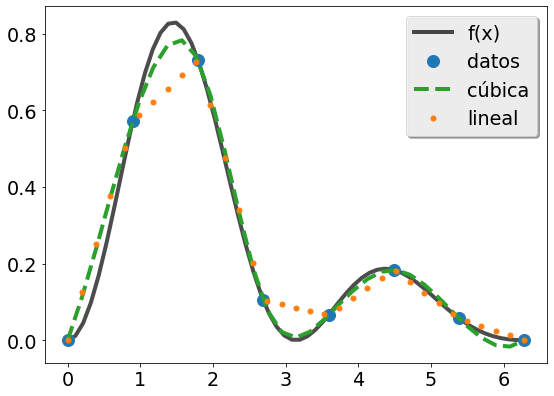

In [47]:
fig= plt.figure(figsize=fsize)
plt.plot(x0,y0,'-k', alpha=0.7, label='f(x)')
plt.plot(x,y,'o', markersize=12, label='datos')
plt.plot(x1,interp['cubic'](x1),  '--', color='C2', label=u'cúbica')
plt.plot(x1,interp['slinear'](x1),'.', label='lineal')
plt.legend(loc='best')

Tratamos de incluir todo en un sólo gráfico (y rogamos que se entienda algo) 

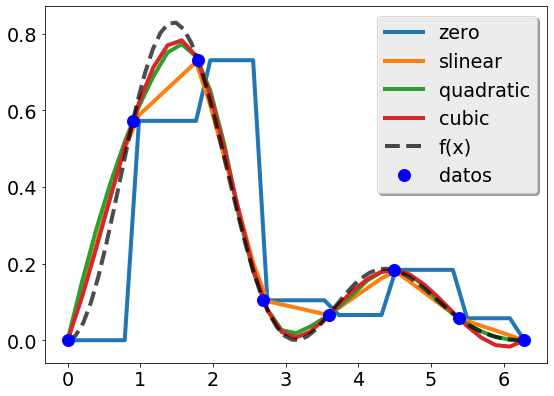

In [50]:
plt.figure(figsize=fsize)
for k, v in interp.items():
  plt.plot(x1, v(x1), label=k)
plt.plot(x0,y0,'--k', alpha=0.7, label='f(x)')
plt.plot(x,y,'ob', markersize=12, label='datos')
plt.legend(loc='best')

En resumen, los métodos disponibles en `interpolate.interp1d` son:

- `linear`: Interpolación lineal, utilizando rectas (default)
- `nearest`         : Valor constante correspondiente al dato más cercano 
- `zero` o  `0`     : Una spline de orden cero. Toma el valor a la izquierda
- `slinear` o  `1`  : Spline de orden 1. Igual a 'linear' 
- `quadratic` o `2` : Spline de segundo orden 
- `cubic` o  `3`    : Spline de tercer orden 



Como vemos de los argumentos `zero`, `slinear`, `quadratic`, `cubic` para especificar splines de cero, primer, segundo y tercer orden se puede pasar como argumento un número. En ese caso se utiliza siempre **splines** y el número indica el orden de las splines a utilizar:

In [51]:
for k,s in zip([0,1,2,3], ['zero','slinear','quadratic','cubic']):
  num = interpolate.interp1d(x,y, kind=k)
  tipo = interpolate.interp1d(x,y, kind=s)
  print("¿{} == {}? -> {}".format(k,s,np.allclose(num(x1), tipo(x1))))

¿0 == zero? -> True
¿1 == slinear? -> True
¿2 == quadratic? -> True
¿3 == cubic? -> True


Además La interpolación lineal simple es, en la práctica, igual a la interpolación por splines de primer orden:

In [52]:
np.allclose(interp['slinear'](x1), interpol_lineal(x1)) # También son iguales

True

Finalmente, veamos que la interpolación `nearest` toma para cada nuevo valor `x1` el valor `y1(x1)` igual a `y(x0)` donde `x0` es el valor más cercano a `x1` mientras que la spline de orden cero (`zero`) toma el valor más cercano a la izquierda:

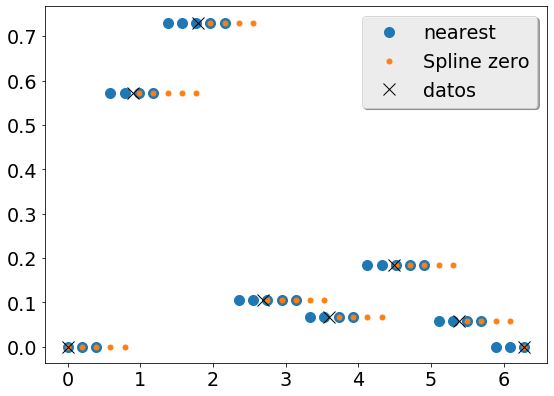

In [53]:
alfa=1
plt.figure(figsize=fsize)
plt.plot(x1, y1_n,'o', label='nearest', alpha=alfa)
plt.plot(x1, interp['zero'](x1), '.', label='Spline zero'.format(k), alpha=alfa)
plt.plot(x,y,'xk', markersize=12, label='datos')

plt.legend(loc='best')

El submódulo `signal` tiene rutinas adicionales para realizar *splines*, que permiten agregar un "alisado", pero en este caso ya no interpolan estrictamente sino que puede ser que la aproximación no pase por los puntos dados.

### B-Splines

Hay otra opción para realizar interpolación con Splines en Scipy. Las llamadas **B-Splines** son funciones diseñadas para generalizar polinomios, con un alto grado de **localidad**.

Para definir las **B-Splines** necesitamos dos cosas: 

  1. Elegir el grado de los polinomios (mayor o igual a 0)
  2. Dividir el intervalo en $n$ "nodos" 

Las funciones se definen mediante la recursión:

\begin{align}\begin{aligned}N_{i, 0}(x) &= 1,\qquad \qquad \textrm{si $t_i \le x < t_{i+1}, \qquad \qquad$ sino $0$,}\\
N_{i, k}(x) &= \frac{x - t_i}{t_{i+k} - t_i} N_{i, k-1}(x)
         + \frac{t_{i+k+1} - x}{t_{i+k+1} - t_{i+1}} N_{i+1, k-1}(x)\end{aligned}\end{align}

Las más simples, cuando el orden es k=0, son funciones constantes a trozos
![](figuras/bsplines0.png)
Para $k>0$ las funciones se calculan por recurrencia en término de dos funciones del orden anterior. Entonces, siempre serán diferentes de cero sólo en un intervalo finito. 
En ese intervalo presentan un único máximo y luego decaen suavemente. Las más usuales son las de orden $k=3$:

![](figuras/bsplines.png)

(Figura de http://www.brnt.eu/phd)



La idea es encontrar una función $f(x)$ que sea suave y pase por la tabla de puntos $(x,y)$ dados, o cerca de ellos con la condición que tanto la función como algunas de sus derivadas sea suave.
La función $f(x)$ se describe como una expansión en la base de Splines (y de ahí el nombre *B-Splines*) 

$$
f(x) = \sum_{j=0} a_{i,j} B_{j}(x) \qquad \forall \quad x_{i} < x \le x_{i+1}
$$

La aproximación se elige de tal manera de optimizar el número de elementos de la base a utilizar con la condición que el error cuadrático a los puntos sea menor a un cierto valor umbral $s$

$$
\sum_{i=1}^{n} \left| f(x_{i}) - y_{i}\right|^2 \le s
$$

Veamos cómo usar la implementación de **Scipy** para interpolar datos. En primer lugar creamos la representación en B-Splines de nuestra tabla de datos $(x,y)$:

In [58]:
tck0 = interpolate.splrep(x,y)

Acá, otra vez estamos operando en dos pasos. En el primero creamos la representación de las splines para los datos dados.
Como no pusimos explícitamente el orden, utiliza el valor por default `k=3`.

En el segundo paso obtenemos los valores interpolados sobre la grilla `x2`:

In [62]:
x2 = np.linspace(0, 2*np.pi, 60) # Nuevos puntos donde interpolar
y_s0 = interpolate.splev(x2, tck0) # Valores interpolados: y_s0[j] = f(x2[j])

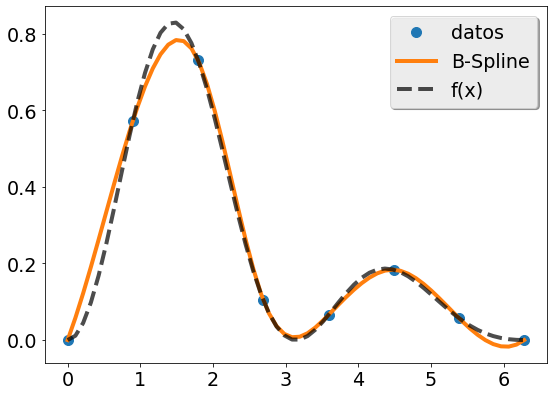

In [65]:
plt.figure(figsize=fsize)
plt.plot(x,y,'o', markersize=12, label='datos')
plt.plot(x2,y_s0,'-', label=r'B-Spline')
plt.plot(x0,y0,'--k', alpha=0.7, label='f(x)')
plt.legend(loc='best');

Estas funciones interpolan los datos con curvas continuas y con derivadas segundas continuas.

### Lines are guides to the eyes

Sin embargo, estas rutinas no necesariamente realizan *interpolación* en forma estricta, pasando por todos los puntos dados, sino que en realidad realiza una aproximación minimzando por cuadrados mínimos la distancia a la tabla de puntos dados.  
Esto es particularmente importante cuando tenemos datos que tienen dispersión. En esos casos necesitamos curvas que no interpolen, es decir que *no necesariamente* pasen por todos los puntos.

La rutina `splrep` tiene varios argumentos opcionales. Entre ellos un parámetro de suavizado `s` que corresponde a la condición de distancia entre la aproximación y los valores de la tabla mencionado anteriormente.  
Para ver como funciona, creemos una tabla de valores `x, y` 
con $x \in [0,2\pi]$ **no necesariamente equiespaciados**, $y=\sin(x)/2$, donde le agregamos algo de ruido a `y`

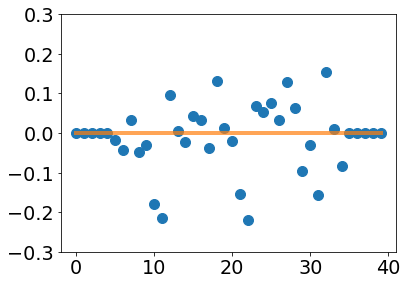

In [80]:
# Creamos dos tablas de valores x, y
x3 = np.linspace(0., 2*np.pi, 40)
x4 = np.linspace(0., 2*np.pi, 40)
x3[5:-5] -= 0.5*(0.5-np.random.random(30)) # Le agregamos una separación al azar
x3.sort()                       # Los ordenamos 
plt.plot(x3-x4,'o',label='data')
plt.plot(x3-x3, '-', alpha=0.7,label='sin incerteza')
plt.ylim((-0.3,0.3));

In [86]:
y4 = 0.5* np.sin(x4)
y3 = 0.5* np.sin(x3) * (1+ 0.6*(0.5-np.random.random(x3.size)))

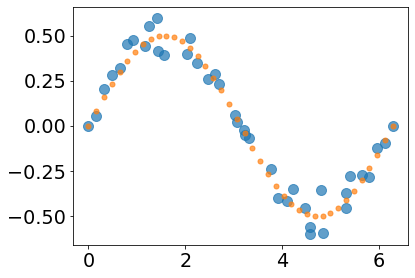

In [89]:
# Los puntos a interpolar tienen "ruido" en las dos direcciones x-y
plt.plot(x3,y3,'o', x4,y4, '.', alpha=0.7 );

In [90]:
# Grilla donde evaluar la función interpolada
x1 = np.linspace(0, 2*np.pi, 90)

In [91]:
tck0 = interpolate.splrep(x3,y3, s=0)  # Interpolación con B-Splines
y_s0 = interpolate.splev(x1,tck0)      # Evaluamos en la nueva grilla
tck3 = interpolate.splrep(x3,y3,s=0.3) # Aproximación suavizada
y_s3 = interpolate.splev(x1,tck3)      # Evaluamos en la nueva grilla

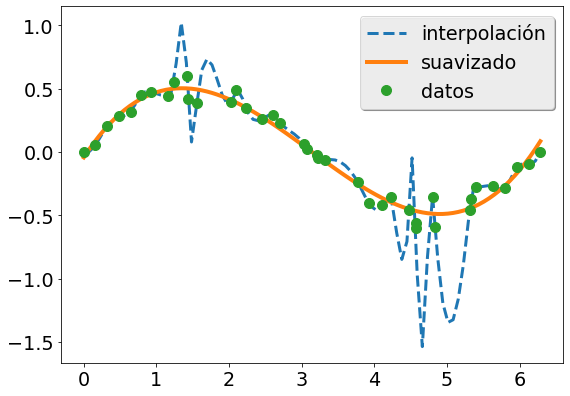

In [92]:
plt.figure(figsize=fsize)
plt.plot(x1,y_s0,'--', lw=3, label=u'interpolación' )
plt.plot(x1,y_s3, "-",  label=u'suavizado');
plt.plot(x3,y3,'o', label='datos' )
plt.legend(loc='best');


El valor del parámetro `s` determina cuanto se suaviza la curva. El valor por default `s=0` obliga al algoritmo a obtener una solución que no difiere en los valores de la tabla, un valor de `s` mayor que cero da cierta libertad para obtener la aproximación que se acerque a todos los valores manteniendo una curva relativamente suave. El suavizado máximo corresponde a `s=1`. Veamos cómo cambia la aproximación con el factor `s`:

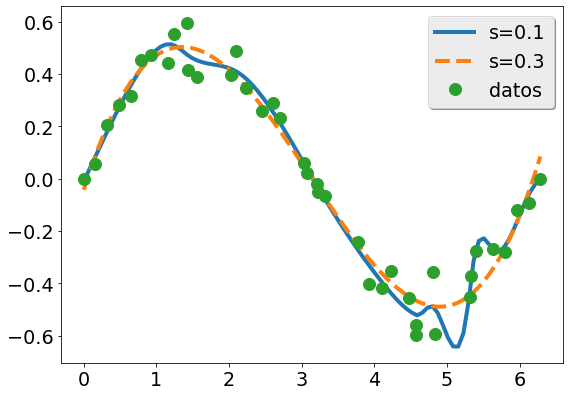

In [93]:
tck1 = interpolate.splrep(x3,y3, s=0.1)  # Interpolación con suavizado
y_s1 = interpolate.splev(x1,tck1)
plt.figure(figsize=fsize)
plt.plot(x1,y_s1, "-",  label=u's=0.1');
plt.plot(x1,y_s3, "--",  label=u's=0.3');
plt.plot(x3,y3,'o', markersize=12, label='datos' )
plt.legend(loc='best');

### Cantidades derivadas de *splines*

De la interpolación (suavizada) podemos calcular, por ejemplo,  la derivada.

In [94]:
yder= interpolate.splev(x1,tck3,der=1) #  Derivada

Si tenemos sólo los datos podríamos tratar de calcular la derivada como el coseno
$$ y' = 0.5 \sqrt{1 - (2y)^2} $$

Comparemos los dos resultados:

In [97]:
cond = (x3 > np.pi/2) & (x3 < 3*np.pi/2)
yprima1 = np.where(cond, -1, 1) * 0.5*np.sqrt(np.abs(1 - (2*y3)**2))

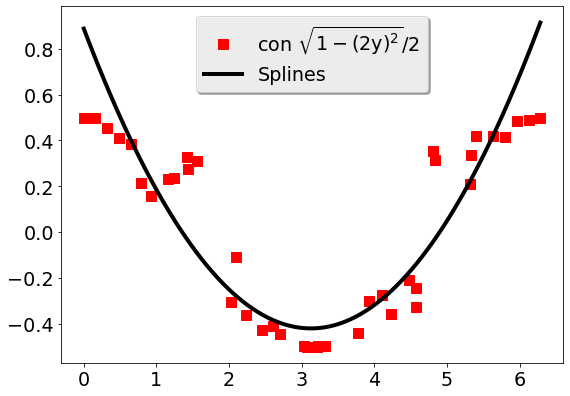

In [98]:
plt.figure(figsize=fsize)
plt.plot(x3, yprima1,"sr", label=r"con $\sqrt{1-(2y)^2}/2$")
plt.plot(x1,yder,'-k', label=u'Splines')
plt.legend(loc='best');

o  podemos calcular la integral, o las raíces de la función

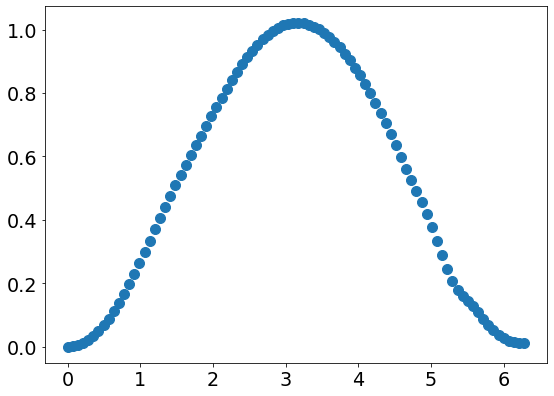

In [99]:
plt.figure(figsize=fsize)
yt= np.array([interpolate.splint(0,t,tck1) for t in x1])
plt.plot(x1,yt,'o');

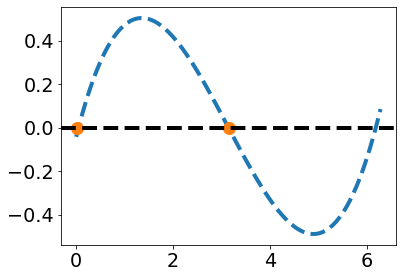

In [110]:
plt.plot(x1,y_s3, "--",  label=u's=0.3');
plt.plot(interpolate.sproot(tck1), [0,0], 'o', markersize=12)
plt.axhline(0, color='k',ls='--');

## Interpolación en dos dimensiones

Un ejemplo del caso más simple de interpolación en dos dimensiones podría ser cuando tenemos los datos sobre una grilla, que puede no estar equiespaciada y necesitamos los valores sobre otra grilla (quizás para graficarlos). En ese caso podemos usar `scipy.interpolate.interp2d()` para interpolar los datos a una grilla equiespaciada. El método necesita conocer los datos sobre la grilla, y los valores de `x` e `y` a los que corresponden.


Definamos una tabla de valores con nuestros datos sobre una grilla $x-y$, no-equiespaciada en la dirección $y$:

In [115]:
import numpy as np
import matplotlib.pyplot as plt
def f(x,y):
  return 5*y*(1-x)*np.cos(4*np.pi*x) * np.exp(-y/2)

# Nuestra tabla de valores
x = np.linspace(0, 4, 13)
y = np.array([0, 1, 2, 3.75, 3.875, 3.9375, 4])


In [116]:
# 
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

In [117]:
# Grilla en la cual interpolar
x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
# Notar que le tenemos que pasar los arrays unidimensionales x e y
f1 = interpolate.interp2d(x, y, Z, kind='linear')
Z1 = f1(x2, y2)
f3 = interpolate.interp2d(x, y, Z, kind='cubic')
Z3 = f3(x2, y2)
f5 = interpolate.interp2d(x, y, Z, kind='quintic')
Z5 = f5(x2, y2)

Ahora tenemos los valores de la función sobre la grilla determinada por todos los posibles pares $(x,y)$ de la tabla original. En el caso de `f1` utilizamos una interpolación lineal para cada punto, en `f3` una interpolación cúbica, y en `f5` una interpolación de orden 5. Grafiquemos los resultados

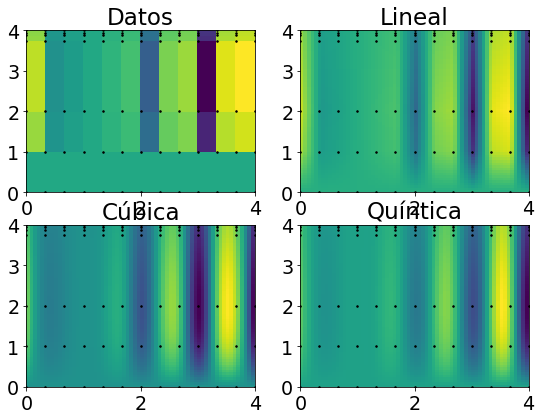

In [118]:
fig, ax = plt.subplots(figsize=fsize, nrows=2, ncols=2)

# Solo para graficar
X2, Y2 = np.meshgrid(x2, y2)

# Agregamos los puntos de la grilla original
for (i,j),a in np.ndenumerate(ax):
  ax[i,j].plot(X,Y,'.k', markersize=3)

ax[0,0].pcolormesh(X, Y, Z)
ax[0,0].set_title('Datos')
ax[0,1].pcolormesh(X2, Y2, Z1)
ax[0,1].set_title('Lineal')
ax[1,0].pcolormesh(X2, Y2, Z3)
ax[1,0].set_title('Cúbica')
ax[1,1].pcolormesh(X2, Y2, Z5)
ax[1,1].set_title('Quíntica')
plt.show()

Acá usamos `numpy.meshgrid()` que permite generar grillas bidimensionales a partir de dos vectores unidimensionales. Por ejemplo de
```python
X, Y = np.meshgrid(x,y)
```


Repitamos un ejemplo simple de uso de `meshgrid()`


In [120]:
a = np.arange(3)
b = np.arange(3,7)
A,B = np.meshgrid(a,b)
print(' a=', a,'\n','b=', b)

 a= [0 1 2] 
 b= [3 4 5 6]


In [121]:
print('A=\n', A,'\n')
print('B=\n', B)

A=
 [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]] 

B=
 [[3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]]


## Interpolación sobre datos no estructurados

Si tenemos datos, correspondientes a una función o una medición sólo sobre algunos valores $(x,y)$ que no se encuentran sobre una grilla, podemos interpolarlos a una grilla regular usando `griddat()`. Veamos un ejemplo de uso

In [123]:
# Generamos los datos
def f(x, y):
    s = np.hypot(x, y)          # Calcula la hipotenusa
    phi = np.arctan2(y, x)      # Calcula el ángulo
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau
# Generamos los puntos x,y,z en una grilla para comparar con la interpolación
# Notar que es una grilla de 100x100 = 10000 puntos
x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)
T = f(X, Y)



In [ ]:
Aquí `T` contiene la función sobre todos los puntos $(x,y)$ obtenidos de combinar cada punto en el vector `x` con cada punto en el vector `y`. Notar que la cantidad total de puntos de `T` es `T.size = 10000`

Elegimos `npts=400` puntos al azar de la función que vamos a usar como tabla de datos a interpolar usando distintos métodos de interpolación

In [ ]:
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)
Z = f(px, py)

Para poder mostrar todos los métodos juntos, vamos a interpolar dentro del loop `for`

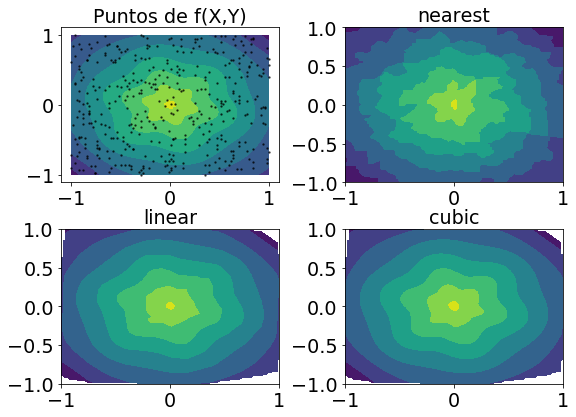

In [ ]:
# Graficación:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=fsize, )

# Graficamos la función sobre la grilla estructurada a modo de ilustración
# Graficamos los puntos seleccionados
ax[0,0].contourf(X, Y, T)
ax[0,0].scatter(px, py, c='k', alpha=0.6, marker='.', s=8)
ax[0,0].set_title('Puntos de f(X,Y)', fontsize='large')

# Interpolamos usando los distintos métodos y graficamos
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = interpolate.griddata((px, py), Z, (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title('{}'.format(method), fontsize='large')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

En la primera figura (arriba a la izquierda) graficamos la función evaluada en el total de puntos (10000 puntos) junto con los puntos utilizados para el ajuste. Los otros tres gráficos corresponden a la función evaluada siguiendo el ajuste correspondiente en cada caso.

## Fiteos de datos

### Ajuste con polinomios

Habitualmente realizamos ajustes sobre datos que tienen incertezas o ruido. Generemos estos datos (con ruido normalmente distribuido)

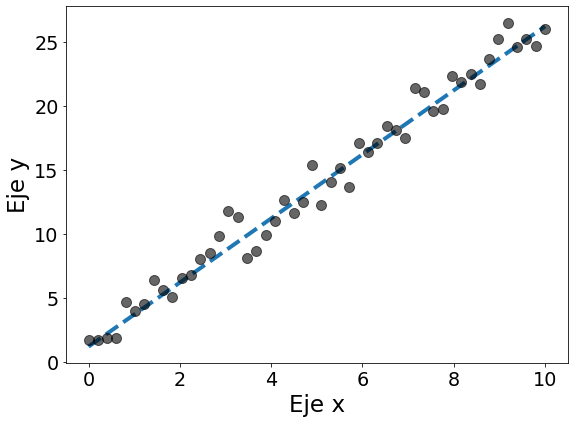

In [136]:
plt.figure(figsize=fsize)
x = np.linspace(0, 10, 50)
y0 = 2.5*x + 1.2
ruido = np.random.normal(loc= 0., scale= 1, size= y0.size)
y = y0 + ruido
plt.plot(x,y0,'--')
plt.plot(x,y, 'ok', alpha=0.6)
plt.xlabel("Eje x")
plt.ylabel("Eje y");

Ahora vamos a ajustar con una recta

$$y = m x + b    \qquad \equiv \qquad    f(x) = p[0] x + p[1]$$

Es una regresión lineal (o una aproximación con polinomios de primer orden)


In [137]:
p = np.polyfit(x,y,1)
# np.info(np.polyfit) # para obtener más información

In [138]:
print(p)
print(type(p))                  # Qué tipo es?

[2.49458444 1.44519004]
<class 'numpy.ndarray'>



---

**NOTA:**
¿Qué devuelve `polyfit()`?

Un array correspondiente a los coeficientes del polinomio de fiteo. En este caso, como estamos haciendo un ajuste lineal, nos devuelve los coeficientes de un polinomio de primer orden (una recta)
```python
y = p[0]*x + p[1]
```
---


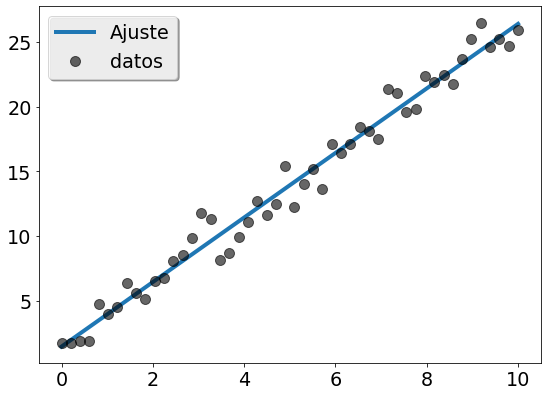

In [139]:
plt.figure(figsize=fsize)
plt.plot(x, p[0]*x + p[1], '-', label='Ajuste')
plt.plot(x,y,'ok', label='datos', alpha=0.6)
plt.legend(loc='best');

Ahora en vez de escribir la recta explícitamente le pedimos a **numpy** que lo hagausando los coeficientes que encontramos mediante el fiteo (utilizando la función *polyval*)

```python
y = np.polyval(p,x)
```

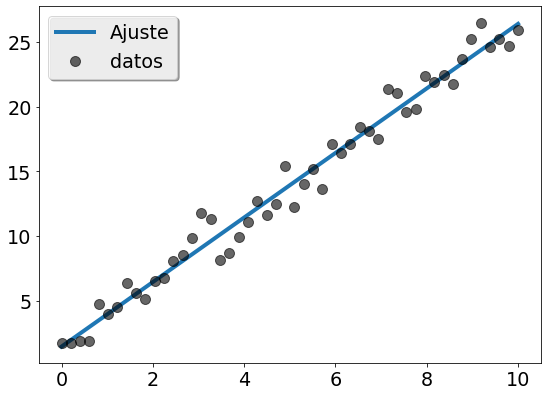

In [140]:
plt.figure(figsize=fsize)
plt.plot(x, np.polyval(p,x), '-', label='Ajuste')
plt.plot(x,y,'ok', label='datos', alpha=0.6)
plt.legend(loc='best');

Como vemos, arroja exactamente el mismo resultado.  
Si los datos tienen mucho ruido lo que obtenemos es, por supuesto, una recta que pasa por la nube de puntos:

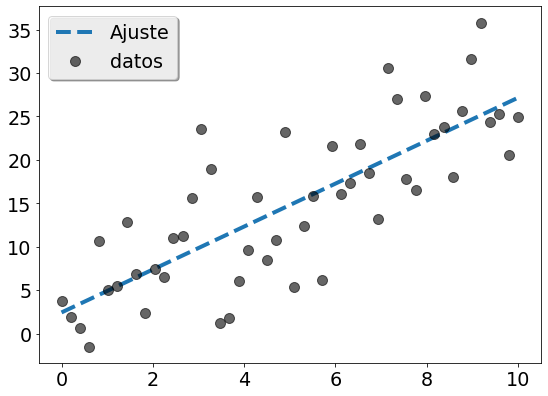

In [143]:
y= y0 + 5*ruido
p = np.polyfit(x, y , 1)
plt.figure(figsize=fsize)
plt.plot(x,np.polyval(p,x),'--', label='Ajuste') 
plt.plot(x,y, 'ok', alpha=0.6, label='datos')
plt.legend(loc='best');

Similarmente podemos usar polinomios de orden superior. Por ejemplo, para utilizar parábolas sólo tenemos que cambiar el orden `n` del polinoio en el argumento de `polyfit(x, y, n)`:

In [144]:
# Generamos los datos
a = [2.5, 1.4, 3.]
y0 = np.polyval(a,x)
y= y0 + 10*ruido

In [145]:
# Ajustamos con un polinomio de segundo grado
p = np.polyfit(x, y , 2)

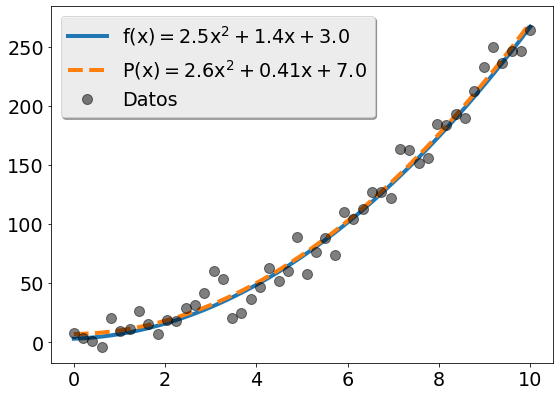

In [146]:
plt.figure(figsize=fsize)
plt.plot(x,y0,'-', label="$f(x)={0:.2}x^2 + {1:.2} x + {2:.2}$".format(*a)) 
plt.plot(x,np.polyval(p,x),'--', label="$P(x)={0:.2}x^2 + {1:.2} x + {2:.2}$".format(*p))
plt.plot(x,y,'ok', alpha=0.7,label='Datos')
plt.legend(loc='best');

## Fiteos con funciones arbitrarias

Vamos ahora a fitear una función que no responde a la forma polinomial.  
El submódulo `optimize` del paquete `scipy` tiene rutinas para realizar ajustes de datos utilizando funciones arbitrarias

Utilicemos una función "complicada":

In [147]:
# string definido para la leyenda
sfuncion= r'${0:.3}\, \sin ({1:.2}\, x {3:+.2f}) \, \exp(-{2:.2f} x)$'

def fit_func(x, a, b, c, d):
  y= a*np.sin(b*x-d)*np.exp(-c*x)
  return y

Generamos ahora "datos" con dispersión basados en la función

$$
f(x) = a \, \sin(b x - d) e^{-c x}
$$

In [148]:
x = np.linspace(0., 2*np.pi, 50)
y0= fit_func(x, 1., 3., 1/3, 0 )
y = y0 + 0.1*ruido

y los graficamos

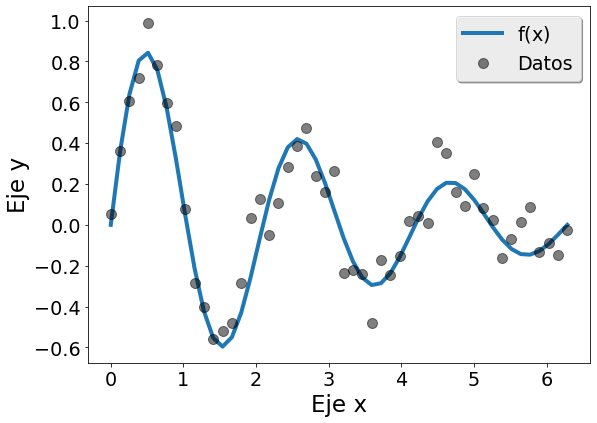

In [149]:
plt.figure(figsize=fsize)
plt.plot(x,y0,'-',label="$f(x)$") 
plt.plot(x,y,'ok',alpha=0.5,label='Datos') # repeated from above
plt.xlabel("Eje x") # labels again
plt.ylabel("Eje y")
plt.legend(loc='best');

Ahora vamos a interpolar los datos utilizando funciones del paquete **Scipy**.  
En primer lugar vamos a utilizar la función `curve_fit`:

In [150]:
from scipy.optimize import curve_fit

In [151]:
# ¿Qué hace esta función?
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

En su forma más simple toma los siguientes argumentos:


    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be determined using introspection, otherwise a ValueError
        is raised).


El primero: `f` es la función que utilizamos para modelar los datos, y que dependerá de la variable independiente `x` y de los parámetros a ajustar.  
También debemos darle los valores tabulados en las direcciones $x$ (la variable independiente) e $y$ (la variable dependiente).  
Además, debido a las características del cálculo numérico que realiza suele ser muy importante darle valores iniciales a los parámetros que queremos ajustar.

Veamos lo que devuelve:


    Returns
    -------
    popt : array
        Optimal values for the parameters so that the sum of the squared error
        of ``f(xdata, *popt) - ydata`` is minimized
    pcov : 2d array
        The estimated covariance of popt.  The diagonals provide the variance
        of the parameter estimate.
    

El primer *array* tiene los parámetros para "best-fit", y el segundo da la estimación del error: la matriz de covarianza


Ya tenemos los valores a ajustar guardados en arrays `x` e `y`

In [164]:
#initial_guess= None 
initial_guess= [1., -1., 1., 0.2]
params, p_covarianza = curve_fit(fit_func, x, y, initial_guess)

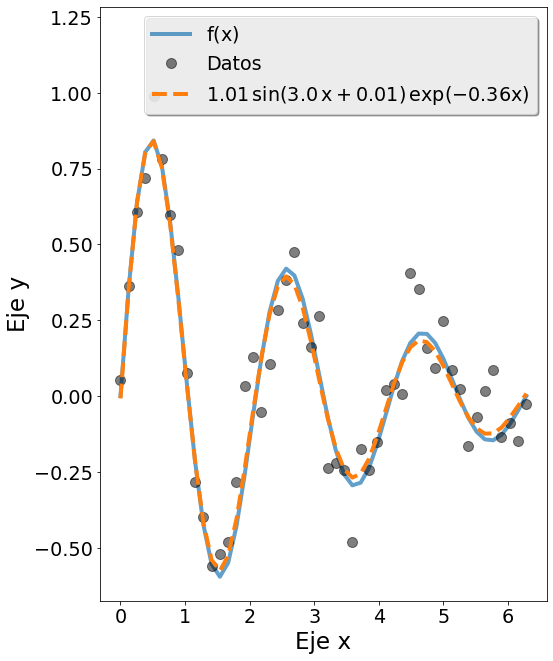

In [165]:
plt.figure(figsize=(8,10))
plt.plot(x,y0,'-', alpha=0.7,label="$f(x)$") 
plt.plot(x,y,'ok', alpha=0.5, label='Datos') # repeated from above
label=sfuncion.format(*params)
plt.plot(x,fit_func(x, *params), '--', label=label)
plt.xlabel("Eje x") # labels again
plt.ylabel("Eje y")
plt.legend(loc='best');
ylim = plt.ylim()
plt.ylim((ylim[0],1.2*ylim[1]));

Veamos otro ejemplo similar, con muchos datos y dispersión

In [166]:
# Puntos "experimentales" con dispersión
x = np.linspace(0., 2*np.pi, 5000)
y0= fit_func(x, 1., 3., 1/3, 0 )
y = y0 + 0.2* np.random.normal(loc= 0., scale= 1, size= y0.size);
# Fiteo

In [168]:
initial_guess= [1., 3., 1., 0.2]
params, p_covarianza = curve_fit(fit_func, x, y, initial_guess)

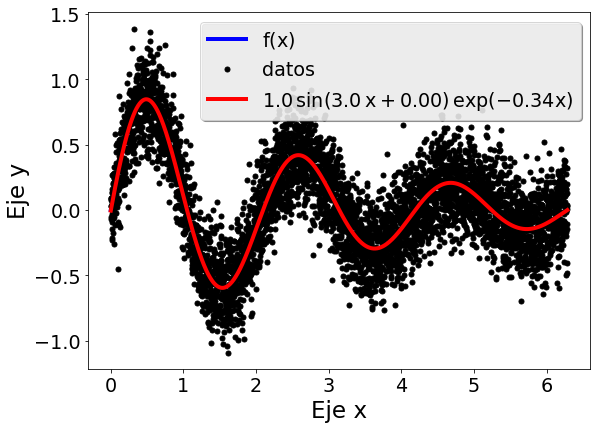

In [169]:
# Graficación
plt.figure(figsize=fsize)
plt.plot(x,y0,'-b',label="$f(x)$") 
plt.plot(x,y,'.k',label='datos') # repeated from above
label=sfuncion.format(*params)
plt.plot(x,fit_func(x, *params), '-r', label=label)
plt.xlabel("Eje x") # labels again
plt.ylabel("Eje y")
plt.legend(loc='best');

La función `curve_fit()` que realiza el ajuste devuelve dos valores: El primero es un *array* con los valores de los parámetros obtenidos, y el segundo es un *array* con los valores correspondientes a la matriz de covarianza, cuyos elementos de la diagonal corresponden a la varianza para cada parámetro

In [74]:
np.diagonal(p_covarianza)

array([1.71310018e-04, 4.19376481e-05, 4.61186624e-05, 1.50808631e-04])

Así, por ejemplo el primer parámetro (correspondiente a la amplitud `a`) toma en estos casos el valor:

In [184]:
for j,v in enumerate(['a','b', 'c', 'd' ]):
  print("{} = {:.5g} ± {:.3g}".format(v, params[j], np.sqrt(p_covarianza[j,j])))

a = 1.0039 ± 0.0131
b = 2.9996 ± 0.00644
c = 0.33548 ± 0.00675
d = 0.0047726 ± 0.0123


### Ejemplo: Fiteo de picos

Vamos a suponer que los datos son obtenidos mediante la repetición de mediciones

In [186]:
# Realizamos 1000 mediciones, eso nos da una distribución de valores
r = np.random.normal(loc=6, size=1000)

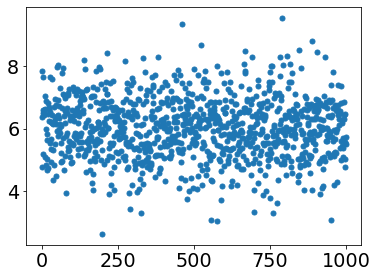

In [187]:
# Veamos qué obtuvimos
plt.plot(r,'.')

In [189]:
y, x = np.histogram(r, bins=30, range=(2,10), density=True)
x = (x[1:]+x[:-1])/2        # Calculamos los centros de los intervalos 

Vamos a graficar el histograma junto con la función Gaussiana con el valor correspondiente de la "Función Densidad de Probabilidad" (pdf)

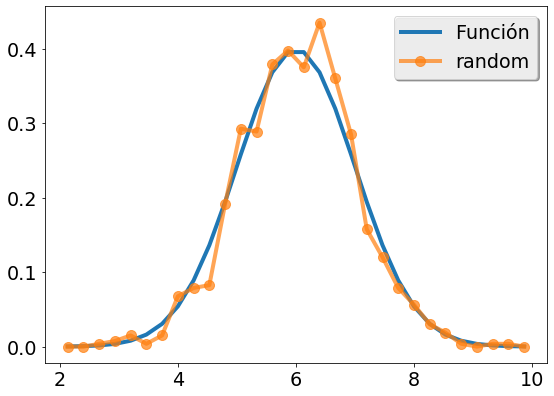

In [190]:
from scipy import stats
b = stats.norm.pdf(x, loc=6)
plt.figure(figsize=fsize)
plt.plot(x,b,'-', label=u'Función')
plt.plot(x,y,'o-', alpha=0.7, label='random')
plt.legend(loc='best');


Con esta idea supongamos que tenemos datos, correspondiente a dos picos, diferentes pero que no podemos distinguirlos completamente porque se superponen.  
Generemos los datos:


In [191]:
npoints= 2000
r = np.r_[np.random.normal(size=npoints), np.random.normal(loc=2, scale=.6, size=npoints)]
y,x = np.histogram(r , bins = 40, range = (-3.5,4.5), density=True)
x = (x[1:]+x[:-1])/2

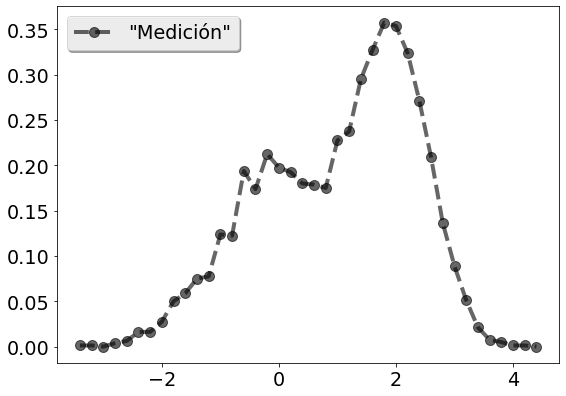

In [192]:
plt.figure(figsize=fsize)
plt.plot(x,y,'o--k', alpha=0.6, label='"Medición"')
plt.legend(loc='best');


Ahora, por razones físicas (o porque no tenemos ninguna idea mejor) suponemos que esta curva corresponde a dos "picos" del tipo Gaussiano, sólo que no conocemos sus posiciones, ni sus anchos ni sus alturas relativas. Creamos entonces una función que describa esta situación: La suma de dos Gaussianas, cada una de ellas con su posición y ancho característico, y un factor de normalización diferente para cada una de ellas. En total tendremos seis parámetros a optimizar:

In [193]:
def modelo(x, *coeffs):
  "Suma de dos Gaussianas, con pesos dados por coeffs[0] y coeffs[3], respectivamente"
  return coeffs[0]*stats.norm.pdf(x,loc=coeffs[1], scale=coeffs[2]) + \
  coeffs[3]*stats.norm.pdf(x,loc=coeffs[4], scale=coeffs[5])

In [194]:
help(modelo)

Help on function modelo in module __main__:

modelo(x, *coeffs)
    Suma de dos Gaussianas, con pesos dados por coeffs[0] y coeffs[3], respectivamente



Ahora es muy fácil realizar el fiteo. Mirando el gráfico proponemos valores iniciales, donde los tres primeros valores corresponde a los parámetros de la primera Gaussiana y los tres últimos a los de la segunda:

In [195]:
c0 = np.array([1., -0.5, 1., 1., 1.5, 1.])
c, cov = curve_fit(modelo, x, y, p0 = c0)
print(c)

[ 0.45146109 -0.10575116  0.92503718  0.54616588  1.94483535  0.63591132]


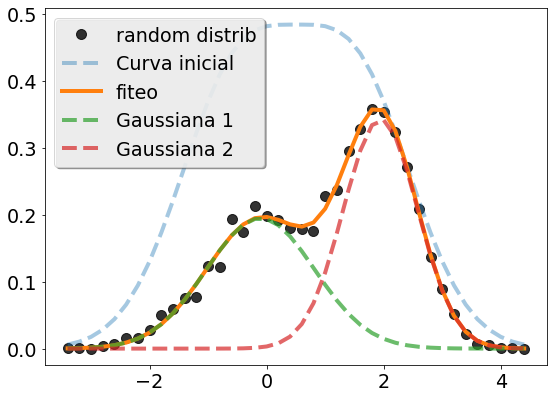

In [196]:
plt.figure(figsize=fsize)
plt.plot(x, y,'ok', alpha=0.8, label='random distrib')
plt.plot(x, modelo(x,*c0), '--', alpha=0.4, label='Curva inicial')
plt.plot(x, modelo(x,*c), '-', label='fiteo')
plt.plot(x,c[0]*stats.norm.pdf(x,loc=c[1], scale=c[2]), '--', alpha=0.7, label='Gaussiana 1')
plt.plot(x,c[3]*stats.norm.pdf(x,loc=c[4], scale=c[5]), '--', alpha=0.7, label='Gaussiana 2')
plt.legend( loc = 'best' );


Veamos un ejemplo de ajuste de datos en el plano mediante la función

$$
f(x, y) = (a \sin{(2  x)} + b) \, \exp{(-c  (x + y - \pi)^2 / 4)}
$$


--------------------------------------------------
Valores de los parámetros
------- -- --- ----------
Real   : (3, 1, 0.5)
Inicial: (1, 4, 1)
Ajuste : [2.99645944 1.00044713 0.4988615 ]


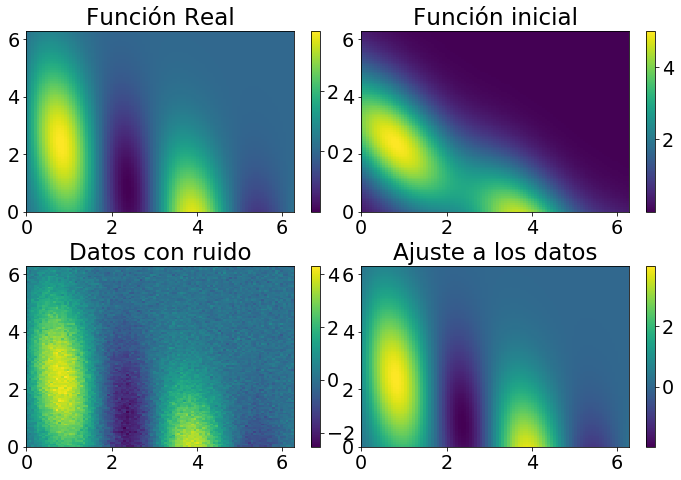

In [206]:
def func(x, a, b, c):
  return (a * np.sin(2 * x[0]) + b) * np.exp(-c * (x[1] + x[0] - np.pi)**2 / 4)

# Límites de los datos. Usados también para los gráficos
limits = [0, 2 * np.pi, 0, 2 * np.pi]  # [x1_min, x1_max, x2_min, x2_max]

sx = np.linspace(limits[0], limits[1], 100)
sy = np.linspace(limits[2], limits[3], 100)

# Creamos las grillas
X1, X2 = np.meshgrid(sx, sy)
forma = X1.shape

# Los pasamos a unidimensional
x1_1d = X1.reshape((1, np.prod(forma)))
x2_1d = X2.reshape((1, np.prod(forma)))

# xdata[0] tiene los valores de x
# xdata[1] tiene los valores de y
xdata = np.vstack((x1_1d, x2_1d))

# La función original que vamos a ajustar. 
# Sólo la usamos para comparar el resultado final con el deseado
original = (3, 1, 0.5)
z = func(xdata, *original)

# Le agregamos ruido. Estos van a ser los datos a ajustar
z_noise = z + .2 * np.random.randn(len(z))

# Hacemos el fiteo
ydata = z_noise
p0 = (1, 4, 1)
popt, pcov = curve_fit(func, xdata, ydata, p0=p0)

print(50*"-")
print("Valores de los parámetros")
print("------- -- --- ----------")
print("Real   : {}\nInicial: {}\nAjuste : {}".format(original, p0, popt))

z_0 = func(xdata, *p0)
Z = z.reshape(forma)
Z_noise = z_noise.reshape(forma)
Z_0 = z_0.reshape(forma)

z_fit = func(xdata, *popt)
Z_fit = z_fit.reshape(forma)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

titulos = [["Función Real", "Función inicial"],
           ["Datos con ruido", "Ajuste a los datos"]]

datos = [[Z, Z_0], [Z_noise, Z_fit]]

for k, a in np.ndenumerate(titulos):
  ax[k[0], k[1]].set_title(a)
  im = ax[k[0], k[1]].pcolormesh(X1, X2, datos[k[0]][k[1]])
  ax[k[0], k[1]].axis(limits)
  fig.colorbar(im, ax=ax[k[0], k[1]])

plt.subplots_adjust(hspace=0.3, wspace=0.)

En este gráfico tenemos:

- Arriba a la izquierda se encuentra para referencia la función real de la que derivamos los datos (que no se utiliza en los ajustes). 
- Abajo a la izquierda se grafican los datos que se van a ajustar
- Arriba a la derecha se encuentra graficada la función con los parámetros iniciales, antes de realizar el ajuste. Como se ve, es muy diferente a los datos, y a la función deseada.
- Abajo a la derecha se grafica la función utilizando los parámetros que se obtienen con el ajuste